#Predicting Stock Market Trends Using Machine Learning Model LSTM and Prophet
This research explores machine learning models for forecasting stock market trends, focusing on Barclays PLC's stock prices from 2004 to 2024. It compares the Prophet model, known for capturing seasonality and long-term trends, with the LSTM model, valued for its ability to capture sequential dependencies and short-term fluctuations. Data from Yahoo Finance underwent intensive preprocessing, including normalization and feature engineering, to optimize model performance. The LSTM model, enhanced with bidirectional layers, showed superior short-term prediction accuracy and lower RMSE compared to the Prophet model. However, Prophet provided valuable insights into long-term trends. The study concludes that while LSTM excels in short-term forecasting, a combined approach could offer a more comprehensive prediction strategy, acknowledging the models' limitations and potential improvements through hybrid methods or external data integration.


**Import necessary libraries for data processing, visualization, and model building**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential
import datetime, math
from datetime import date, timedelta
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras import losses, optimizers
from sklearn.impute import SimpleImputer
from keras.utils import plot_model
import matplotlib.pyplot as plt
from prophet import Prophet

**Set random seed for reproducibility of results**

In [2]:
# Fixing the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
set_random_seed(42)

**Load historical stock data using yfinance for a specified ticker symbol**

In [3]:
#Loading Data
ticker = "BARC.L"
data = yf.download(ticker, start="2004-01-01", end="2024-06-28")

[*********************100%%**********************]  1 of 1 completed


**Display the raw stock data**

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,460.255798,460.255798,460.255798,460.255798,239.196320,0
2004-01-02,461.872406,467.691986,459.101105,465.567413,241.956940,12189658
2004-01-05,467.876709,468.800507,461.179596,467.414886,242.917068,22407584
2004-01-06,467.414886,475.728607,464.458893,473.881104,246.277466,49266655
2004-01-07,473.881104,478.961700,470.075195,471.802612,245.197342,45080811
...,...,...,...,...,...,...
2024-06-21,208.050003,210.850006,202.899994,204.850006,202.169220,85228878
2024-06-24,204.949997,209.300003,203.850006,207.550003,204.833878,50595956
2024-06-25,207.399994,208.800003,205.750000,206.149994,203.452194,62344856


**Clean the data by resetting the index, removing any rows with missing values, and imputation**

In [5]:
#Data Cleaning
data.reset_index(inplace=True)
data.dropna(inplace=True)

#Handling missing values in a more robust way
imputer = SimpleImputer(strategy='mean')
data['Close'] = imputer.fit_transform(data[['Close']])

**Display the cleaned stock data**

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,460.255798,460.255798,460.255798,460.255798,239.196320,0
1,2004-01-02,461.872406,467.691986,459.101105,465.567413,241.956940,12189658
2,2004-01-05,467.876709,468.800507,461.179596,467.414886,242.917068,22407584
3,2004-01-06,467.414886,475.728607,464.458893,473.881104,246.277466,49266655
4,2004-01-07,473.881104,478.961700,470.075195,471.802612,245.197342,45080811
...,...,...,...,...,...,...,...
5186,2024-06-21,208.050003,210.850006,202.899994,204.850006,202.169220,85228878
5187,2024-06-24,204.949997,209.300003,203.850006,207.550003,204.833878,50595956
5188,2024-06-25,207.399994,208.800003,205.750000,206.149994,203.452194,62344856
5189,2024-06-26,207.100006,207.921997,204.649994,205.850006,203.156128,86932141


**Display a summary of the DataFrame's structure and data types**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5191 non-null   datetime64[ns]
 1   Open       5191 non-null   float64       
 2   High       5191 non-null   float64       
 3   Low        5191 non-null   float64       
 4   Close      5191 non-null   float64       
 5   Adj Close  5191 non-null   float64       
 6   Volume     5191 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 284.0 KB


**Plot the closing price of Barclays stock**

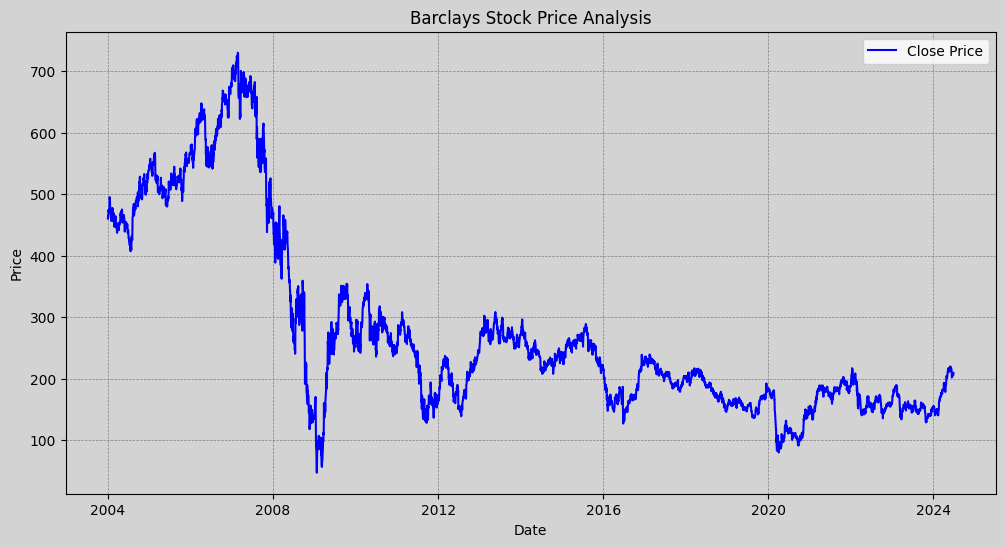

In [8]:
plt.figure(figsize=(12, 6))

# Plotting the closing price
plt.plot(data["Date"], data["Close"], label='Close Price', color='blue')
plt.title("Barclays Stock Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')  # Plot background
plt.gcf().set_facecolor('lightgray')  # Figure background
plt.legend()
plt.show()

**Calculate and plot the 100-day and 200-day moving averages of the 'Close' prices, along with the original closing prices, to analyze the stock's long-term trends**


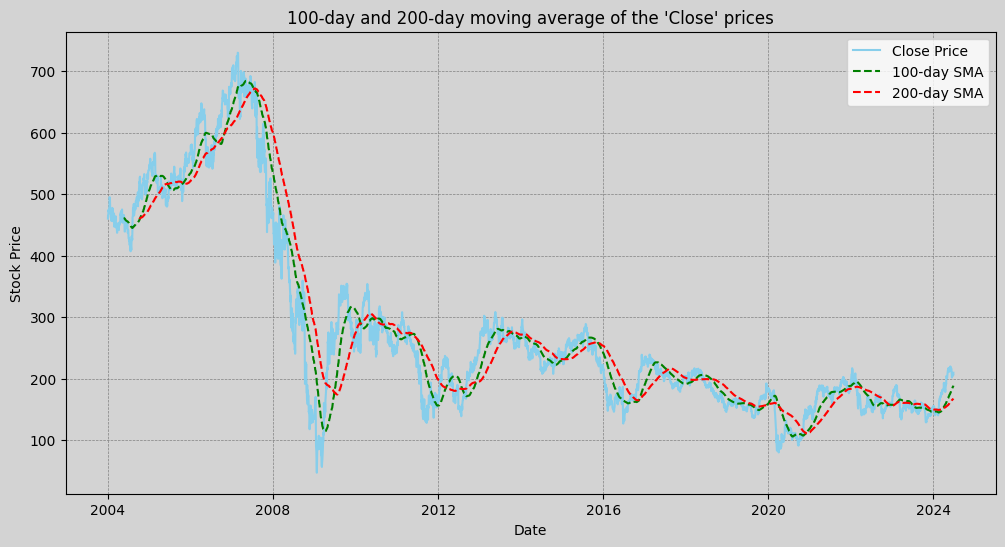

In [9]:
#Calculating and plotting the 100-day and 200-day moving average of the 'Close' prices
data['SMA_100'] = data['Close'].rolling(window=100).mean()  # 100-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Close"], label='Close Price',  color='skyblue')
plt.plot(data["Date"], data['SMA_100'], label='100-day SMA',linestyle='--', color='g')
plt.plot(data["Date"], data['SMA_200'], label='200-day SMA',linestyle='--', color='r')
plt.title("100-day and 200-day moving average of the 'Close' prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.legend()
plt.show()

**Split the data into training and test sets to scale the data between 0 and 1 and create sequences for LSTM model training**


In [10]:
# Splitting Data
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.transform(data_test)

# Creating Training Sequences
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

**Generate training and test sequences with a specified time step, and reshape the input data for LSTM model compatibility**

In [11]:
time_step = 100
X_train, y_train = create_sequences(data_train_scale, time_step)
X_test, y_test = create_sequences(data_test_scale, time_step)

# Reshape input to be samples, time steps, features which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Build and compile a bidirectional LSTM model with dropout layers for regularization, and fit it to the training data with validation**

In [12]:
# Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(time_step, 1))))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(50, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(50)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model to the training data with validation data
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 351ms/step - loss: 0.0127 - val_loss: 2.4182e-04
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 72s 272ms/step - loss: 0.0019 - val_loss: 4.8758e-04
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - loss: 0.0017 - val_loss: 1.0464e-04
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 278ms/step - loss: 0.0015 - val_loss: 5.8203e-04
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - loss: 0.0014 - val_loss: 2.4892e-04
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/step - loss: 0.0012 - val_loss: 3.6357e-04
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - loss: 0.0012 - val_loss: 7.3281e-05
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - loss: 0.0010 - val_loss: 7.3808e-05
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - loss: 0.0010 - val_loss: 2.0616e-04
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - loss: 9.9912e-04 - val_loss: 5.6364e-04
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/ste

**Plot the training and validation loss over epochs to evaluate the model's performance during training**


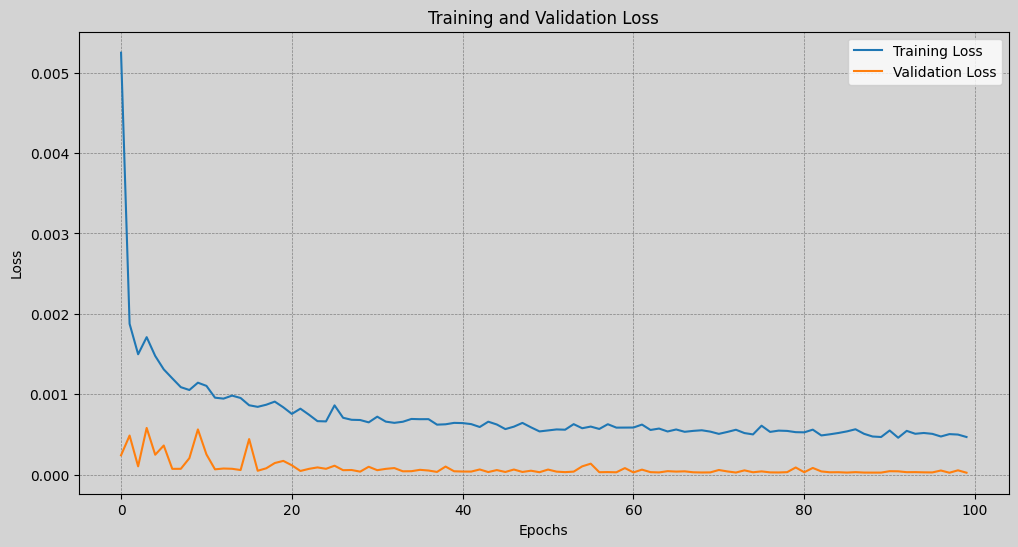

In [13]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

**Display a summary of the LSTM model's architecture, including the layers and parameters**

In [14]:
#Summarizing the Model architecture
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100, 100)            │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 100)            │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,105 (1.62 MB)

 Trainable params: 141,701 (553.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 283,404 (1.08 MB)

**Generate a visual plot of the LSTM model architecture, displaying layer names and shapes**

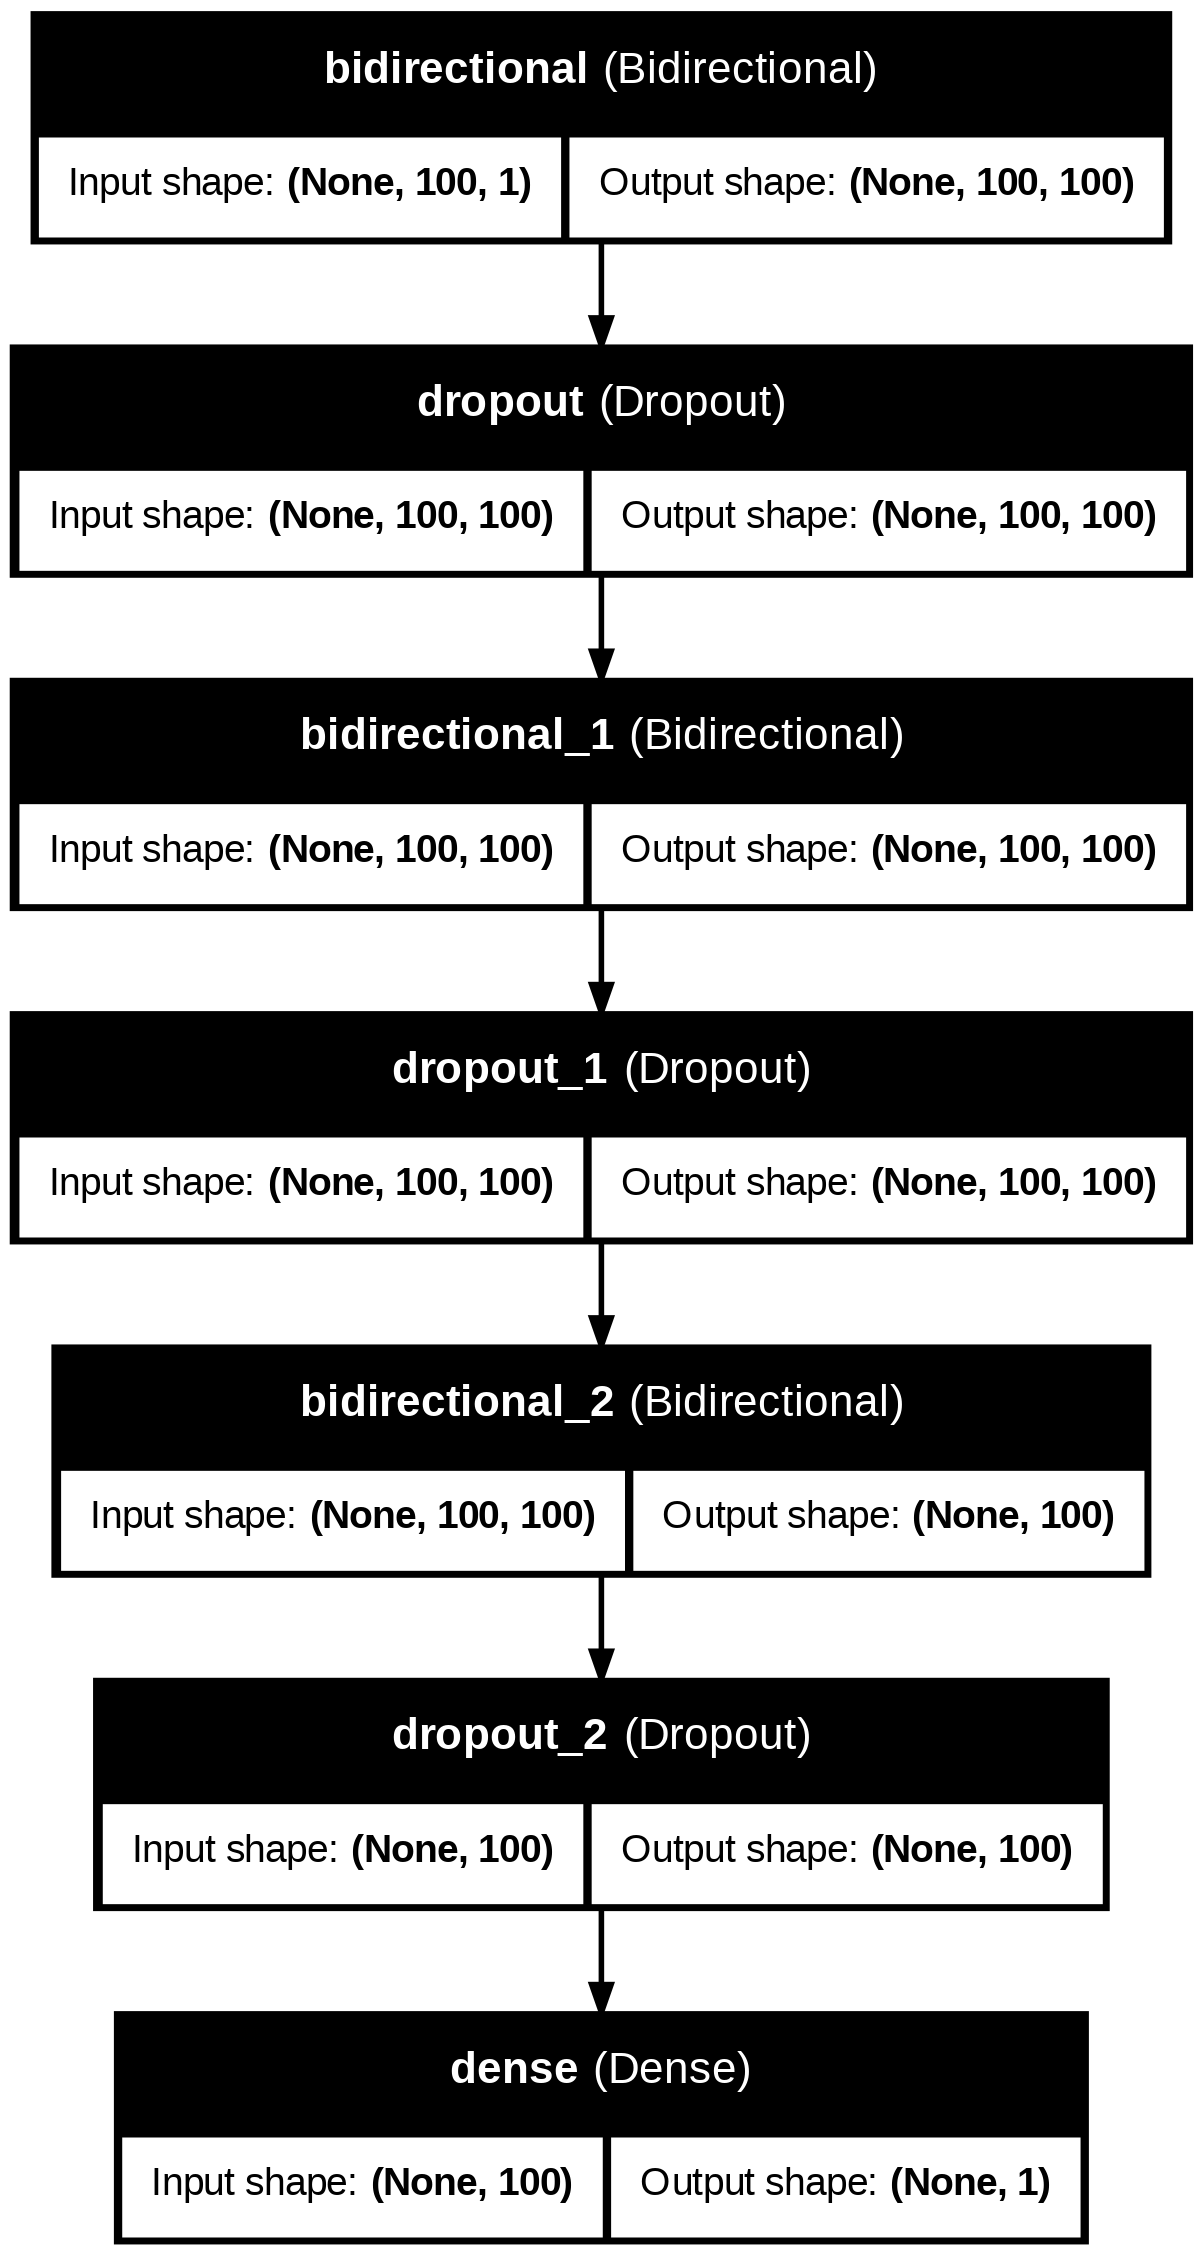

In [15]:
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Predict on the training and test data, inverse transform the predictions to the original scale and calculate the RMSE for both datasets**

In [16]:
# Predicting on the Test Data
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Inverse Transforming the Predictions and Actual Values to Original Scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'RMSE on Training Data: {rmse_train}')
print(f'RMSE on Test Data: {rmse_test}')

127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step
RMSE on Training Data: 8.735438211257899
RMSE on Test Data: 3.440968156850717


**Plot the LSTM model's training and test predictions to visualize the model's performance**

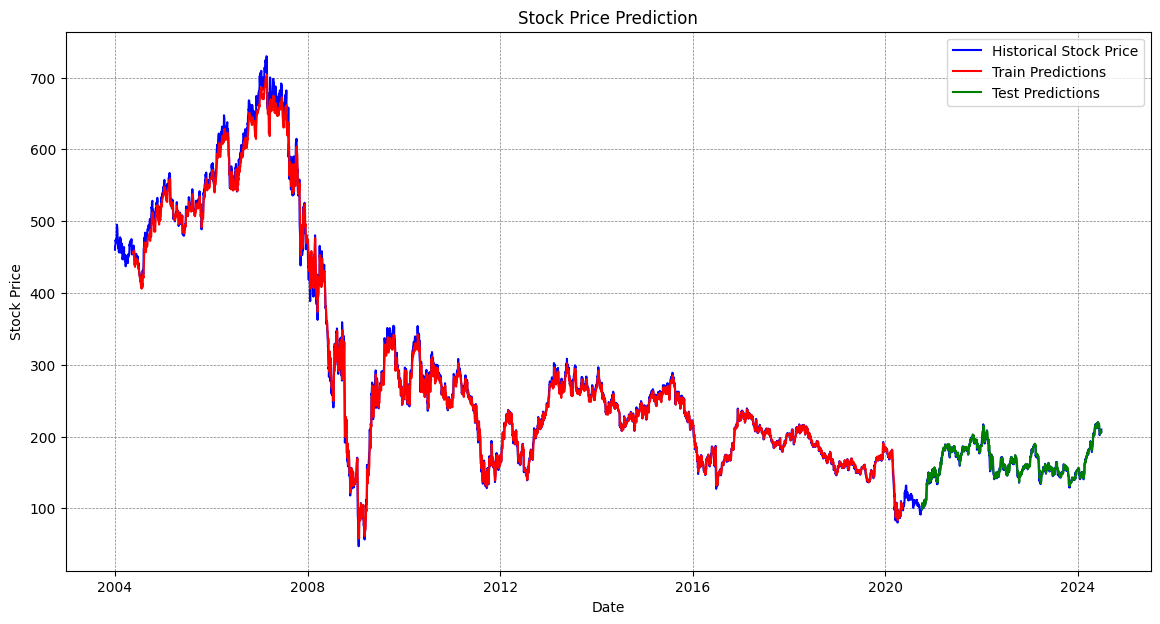

In [17]:
# Plotting the Predictions and Actual Values
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Historical Stock Price', color='blue')
plt.plot(data['Date'][time_step:len(train_predict)+time_step], train_predict, label='Train Predictions', color='red')
plt.plot(data['Date'][len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predictions', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

**Predict future stock prices for the next 100 days using the LSTM model, and plot both historical data and future predictions**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

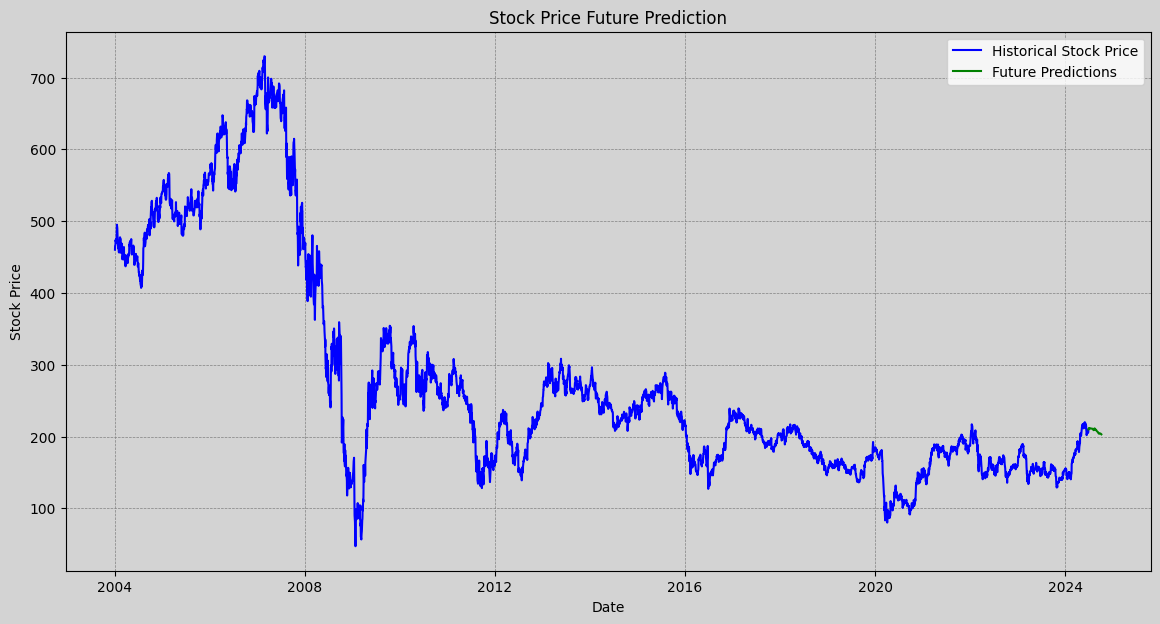

In [18]:
# Future Prediction Code
# Ensure correct scaling and transformation of the last 100 days
last_100_days = data['Close'].values[-100:].reshape(-1, 1)
last_100_days_scaled = scaler.transform(last_100_days)

# Ensure correct shape of the input data
current_input = last_100_days_scaled.reshape(1, last_100_days_scaled.shape[0], last_100_days_scaled.shape[1])

# Number of future days to predict
future_days = 100

# Generating future predictions
future_predictions = []

for _ in range(future_days):
    future_pred = lstm_model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    current_input = np.append(current_input[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(last_date + timedelta(1), periods=future_days).tolist()

# Plotting the future predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.title('Stock Price Future Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

**Prepare data for the Prophet model and fit the model to make future predictions and calculate the RMSE on the historical data**

In [19]:
# Prepare the data for Prophet
prophet_data = data[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=future_days)
forecast = prophet_model.predict(future)

# Extract the historical predictions
historical_forecast = forecast[forecast['ds'].isin(prophet_data['ds'])]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(prophet_data['y'], historical_forecast['yhat']))
print(f'RMSE: {rmse}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpraultdtj/pz_4i_x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpraultdtj/eu33dxro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10470', 'data', 'file=/tmp/tmpraultdtj/pz_4i_x7.json', 'init=/tmp/tmpraultdtj/eu33dxro.json', 'output', 'file=/tmp/tmpraultdtj/prophet_model_djb0nou/prophet_model-20240826031332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 27.44229782427071


**Plot the observed data points along with the Prophet model's forecast to visualize the predictions**

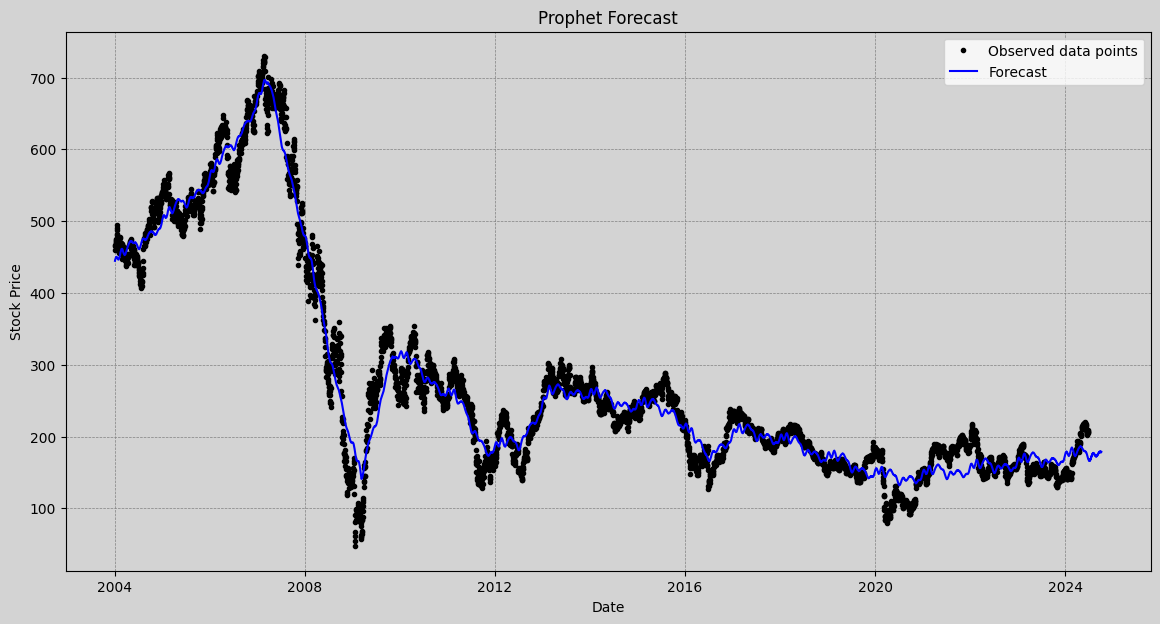

In [20]:
# Plotting the Prophet predictions
plt.figure(figsize=(14, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], 'k.', label='Observed data points')
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

**Combine and plot the LSTM and Prophet model predictions along with historical stock prices for comparison**

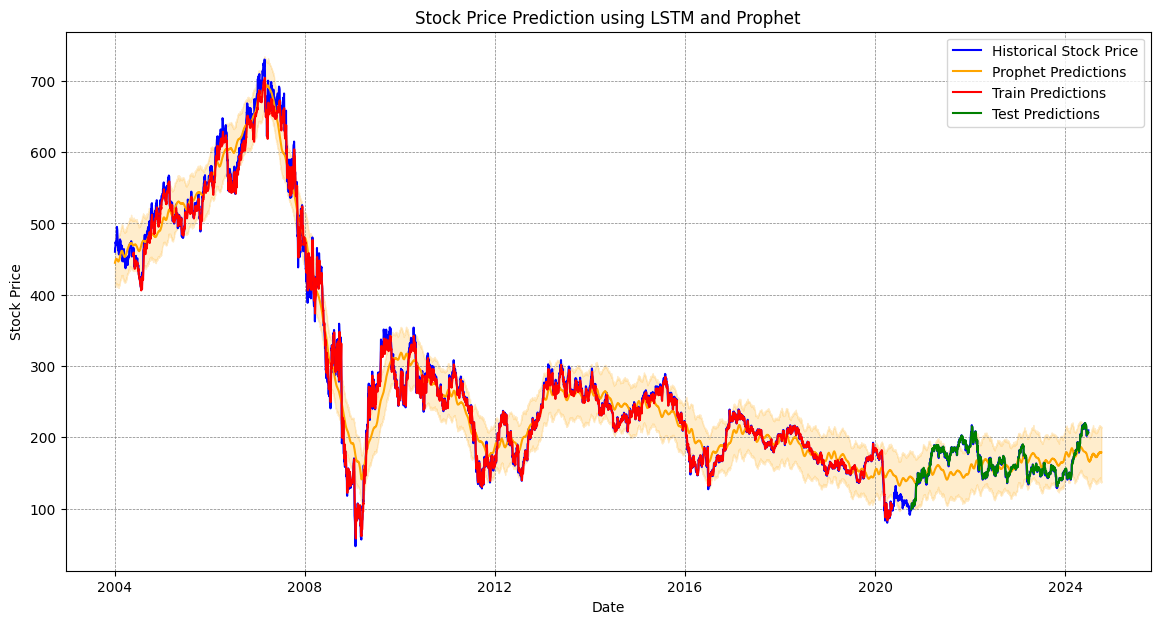

In [21]:
# Combine LSTM and Prophet predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(forecast['ds'], forecast['yhat'], color='orange', label='Prophet Predictions')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.plot(data['Date'][time_step:len(train_predict)+time_step], train_predict, color='red', label='Train Predictions')
plt.plot(data['Date'][len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, color='green', label='Test Predictions')
plt.title('Stock Price Prediction using LSTM and Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

**Create and display a DataFrame comparing the actual and predicted closing prices on the test set**

In [22]:
# Print the prediction and the actual close value for comparison
comparison_df = pd.DataFrame({
    'Date': data['Date'][len(data_train):len(data_train) + len(y_test)],
    'Actual': y_test.flatten(),
    'Predicted': test_predict.flatten()
})

comparison_df

,Date,Actual,Predicted
4152,2020-05-14,99.449997,99.112511
4153,2020-05-15,104.180000,100.571037
4154,2020-05-18,104.500000,104.838341
4155,2020-05-19,107.099998,105.558601
4156,2020-05-20,107.279999,107.434975
...,...,...,...
5085,2024-01-26,208.050003,207.251801
5086,2024-01-29,204.850006,208.291183
5087,2024-01-30,207.550003,205.599426
5088,2024-01-31,206.149994,207.529572


#Conclusion
**This research explained ways to forecast Barclays PLC stock prices using LSTM and Prophet models. While Prophet was able to identify long-term trends and seasonality, LSTM was more successful at forecasting short-term variations. While LSTM demonstrated superior accuracy with a lower RMSE, Prophet offered insightful trend information. By combining the accuracy of LSTM with the wider outlook of Prophet, a holistic forecasting approach was provided. To further increase forecast accuracy, future developments might investigate hybrid models that include outside data sources. All things considered, this method underlines how useful machine learning is for stock market predictions.**

**The conclusion that the LSTM model is better trained for stock price prediction in this situation is further supported by the fact that the LSTM model's Root Mean Square Error (RMSE) is lower on both training (Train RMSE: 8.7354) and test datasets(Test RMSE: 3.4410) when compared to the Prophet model(Prophet RMSE: 27.44). Because of its high accuracy and good generalization to new data, it is a powerful tool for analysts and investors who want to forecast stock prices and make judgments based on current market conditions and trends.**